## **SVM**

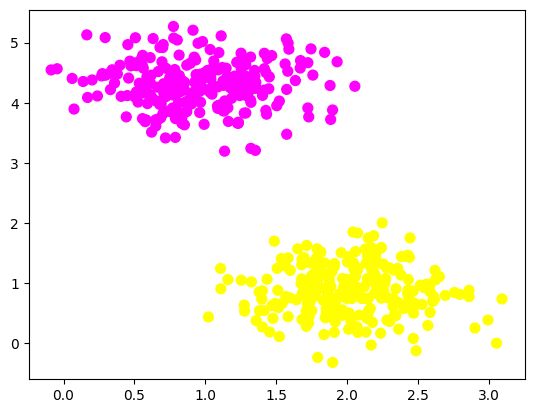

In [1]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=500,centers=2, random_state=0, cluster_std=0.40)

import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:, 1], c=Y, s=50, cmap='spring');
plt.show()

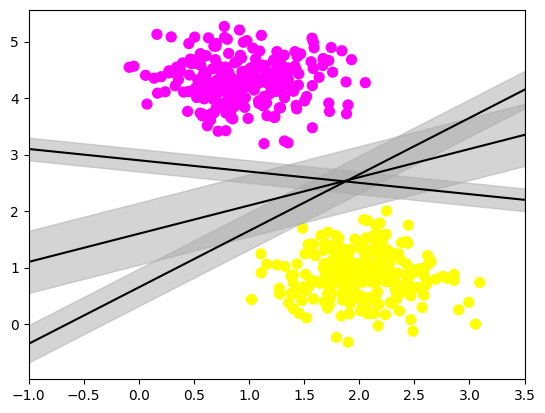

In [2]:

import numpy as np
xfit= np.linspace(-1,3.5)

plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="spring")

for m, b, d in [(1, 0.65, 0.33 ), (0.5,1.6,0.55), (-0.2, 2.9, 0.2)]:
    yfit= m * xfit+ b
    plt.plot(xfit,yfit, '-k')
    plt.fill_between(xfit, yfit -d, yfit+ d, edgecolor='none',
                    color='#AAAAAA', alpha=0.5)
plt.xlim(-1,3.5);
plt.show()

In [3]:
from sklearn.datasets import fetch_lfw_people
yuzler = fetch_lfw_people(min_faces_per_person = 60)

print(yuzler.target_names)
print(yuzler.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


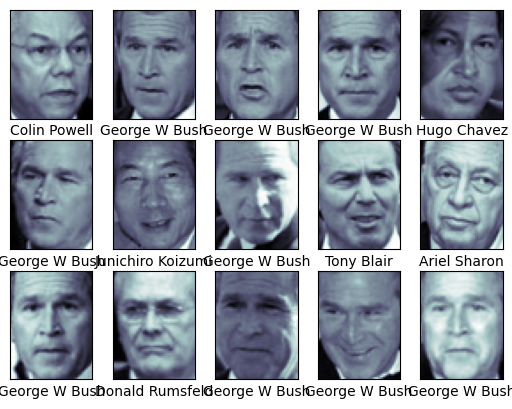

In [4]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(3,5) # tablo 3 satır 5 sütundan oluşuyor.
for i, axi in enumerate (ax.flat):
    axi.imshow(yuzler.images[i],cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=yuzler.target_names[yuzler.target[i]]) # döngü ile her bir fotoğraf isim soyisim
    #eşleştirilmesi yapıldı. x ve y ticks listeleri grafiğin x ve y koordinatlarındaki verilerin yerleştirilmesi içiin oluşturuldu.

### Algoritma Modeli Oluşturma


In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components= 150,whiten=True, random_state=42,svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight= 'balanced')
model = make_pipeline(pca,svc)

In [6]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(yuzler.data,yuzler.target, random_state= 42)

In [7]:
from sklearn.model_selection import GridSearchCV
grid_prm= {'svc__C':[1,5,10,50],
          'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model,grid_prm)
%time grid.fit(Xtrain,ytrain)
print(grid.best_params_)

CPU times: user 52.9 s, sys: 38.4 s, total: 1min 31s
Wall time: 1min
{'svc__C': 5, 'svc__gamma': 0.001}


In [8]:
model = grid.best_estimator_
yfit= model.predict(Xtest)

Text(0.5, 0.98, 'Kisi Soyisimler: Yanlışlar Kırmızı İşaretli')

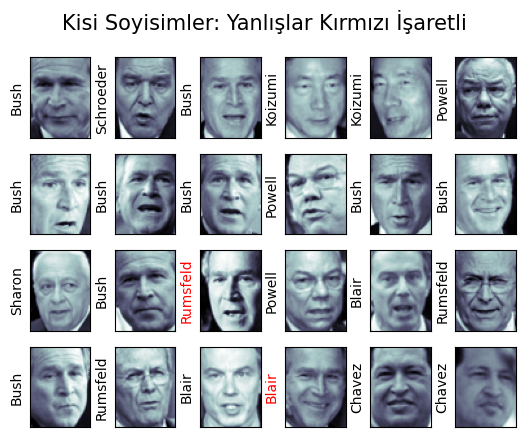

In [9]:
fig, ax = plt.subplots(4,6)
for i ,axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(yuzler.target_names[yfit[i]].split()[-1],
                  color='black' if yfit[i]==ytest[i] else 'red')

fig.suptitle('Kisi Soyisimler: Yanlışlar Kırmızı İşaretli', size= 15)